# Exercices d'application

## 1. Mise en forme d'un tableau

- charger le tableau tableau.csv dans data
- décrire son contenu
- Combien de journaux différents sont dans la base de données
- Recoderles journaux

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("../../../data/tableau_presse.csv")

In [8]:
df.columns

Index(['Date_raw', 'Titre_raw', 'Journal_raw', 'Contenu_raw', 'Auteur_raw',
       'Date_mod', 'Titre_mod', 'Contenu_mod', 'Journal_mod'],
      dtype='object')

In [9]:
df["Journal_mod"].value_counts()

Le Figaro                                                             277
Le Monde                                                              233
Acteurs Publics                                                        89
La Croix                                                               78
Aujourd'hui en France                Edition Principale                64
Le Point                                                               61
Libération                                                             59
L'Express                                                              58
l'Humanité                                                             49
Valeurs Actuelles                                                      27
Aujourd'hui en France                Edition Principale ; Toulouse      3
Le Monde Campus                                                         2
Name: Journal_mod, dtype: int64

In [15]:
reco = {
        "Aujourd'hui en France                Edition Principale":"Aujourd'hui en France",
        "Aujourd'hui en France                Edition Principale ; Toulouse":"Aujourd'hui en France",
        "Le Monde Campus":"Le Monde"
        }
df["Journal_mod"] = df["Journal_mod"].replace(reco)

In [16]:
df["Journal_mod"].value_counts()

Le Figaro                277
Le Monde                 235
Acteurs Publics           89
La Croix                  78
Aujourd'hui en France     67
Le Point                  61
Libération                59
L'Express                 58
l'Humanité                49
Valeurs Actuelles         27
Name: Journal_mod, dtype: int64

## 2. Ajouter une variable quantitative

- Ajouter une colonne qui représente le nombre de mots par article
- Ajouter une colonne qui contient le nombre d'occurence du terme d'intérêt

In [28]:
def nombre_mots(texte):
    """
    Renvoyer le nombre de mots
    d'un texte
    """
    return len(texte.split(" "))


Attention : il y a une erreur car il y a des valeurs manquantes, donc on utilise .fillna pour les remplacer par des chaines de caractères vides

In [30]:
df["nb_mots"] = df["Contenu_mod"].fillna("").apply(nombre_mots)

In [32]:
#df.head()

In [37]:
def compter_terme_specifique(texte, mot="intelligence artificielle"):
    """
    Compter un terme spécifique dans un texte
    """
    return texte.lower().count(mot)

In [38]:
df["nb_ai"] = df["Contenu_mod"].fillna("").apply(compter_terme_specifique)

Calculer une fréquence normalisée

In [42]:
df["densite"] = df["nb_ai"]/df["nb_mots"]

In [40]:
#df.head()

## 3. Statistiques descriptives

- Faire des statistiques univariées sur ces deux variables
- Représenter un histogramme
- Regarder la distribution par journaux
- Regarder l'utilisation de la fonctions https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

In [43]:
df["densite"].describe()

count    1000.000000
mean        0.003390
std         0.008116
min         0.000000
25%         0.001045
50%         0.001576
75%         0.003177
max         0.125000
Name: densite, dtype: float64

<Axes: >

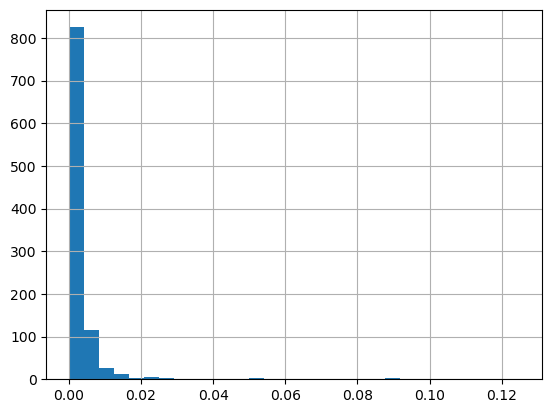

In [46]:
df["densite"].hist(bins=30)

In [49]:
df[df["densite"]>0.03]["Titre_mod"]

44        [TECH La nouvelle offensive de Google dans...]
60                                                Voyage
204            [TECH Les coûteuses ambitions de Meta...]
288    Spécial - MOBILITÉ\n\nLes nouveaux défis de l'...
327                               Vive le Québec livre !
468    Pharmacie\n\nL’IA, un espoir pour créer de nou...
747    Technologies\n\nLe français Mistral AI veut « ...
773                                           Innovation
818      Téléphonie\n\nFin de règne pour les smartphones
917    [Si on considère que la bataille du cloud est...]
948                                             sciences
Name: Titre_mod, dtype: object

<Axes: title={'center': 'densite'}, xlabel='Journal_mod'>

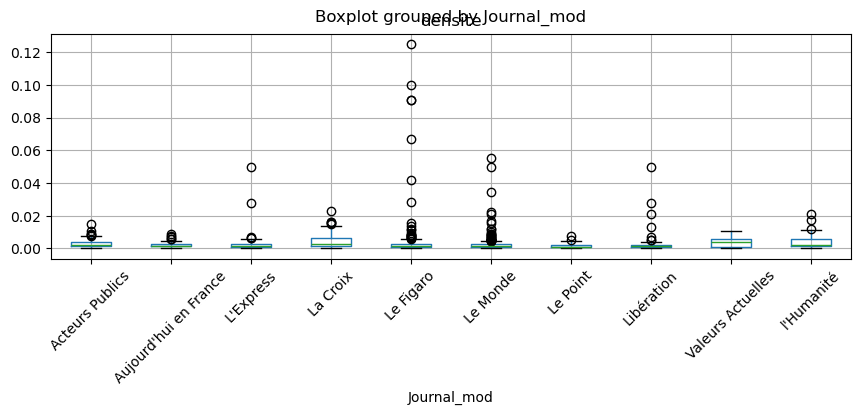

In [53]:
df.boxplot(column="densite", by="Journal_mod", figsize=(10,3), rot=45)